In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as scp
import sys
import os

In [27]:
int(name.split(" ")[-1][:-1])

3

======= Teil 1 100mV =====
Koerzitivmagnetisierung: 8.3
Remanenzmagnetisierung: 8.36 e4
Maximale Magnetisierung 17.12 e4
======= Teil 1 1V =====
Koerzitivmagnetisierung: 10.99
Remanenzmagnetisierung: 9.5 e4
Maximale Magnetisierung 28.84 e4
======= Teil 1 300mV =====
Koerzitivmagnetisierung: 11.33
Remanenzmagnetisierung: 10.66 e4
Maximale Magnetisierung 24.26 e4
======= Teil 1 3V =====
Koerzitivmagnetisierung: 6.86
Remanenzmagnetisierung: 7.15 e4
Maximale Magnetisierung 30.86 e4


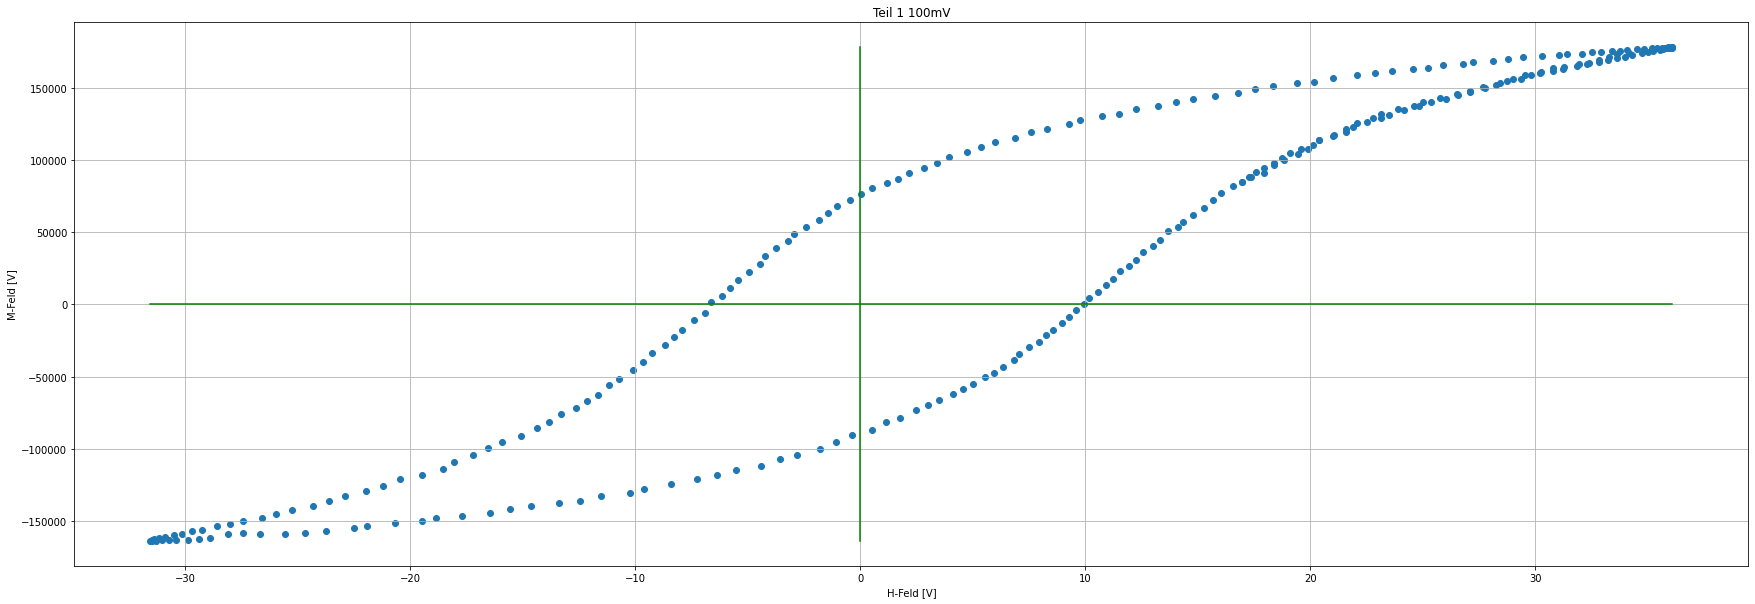

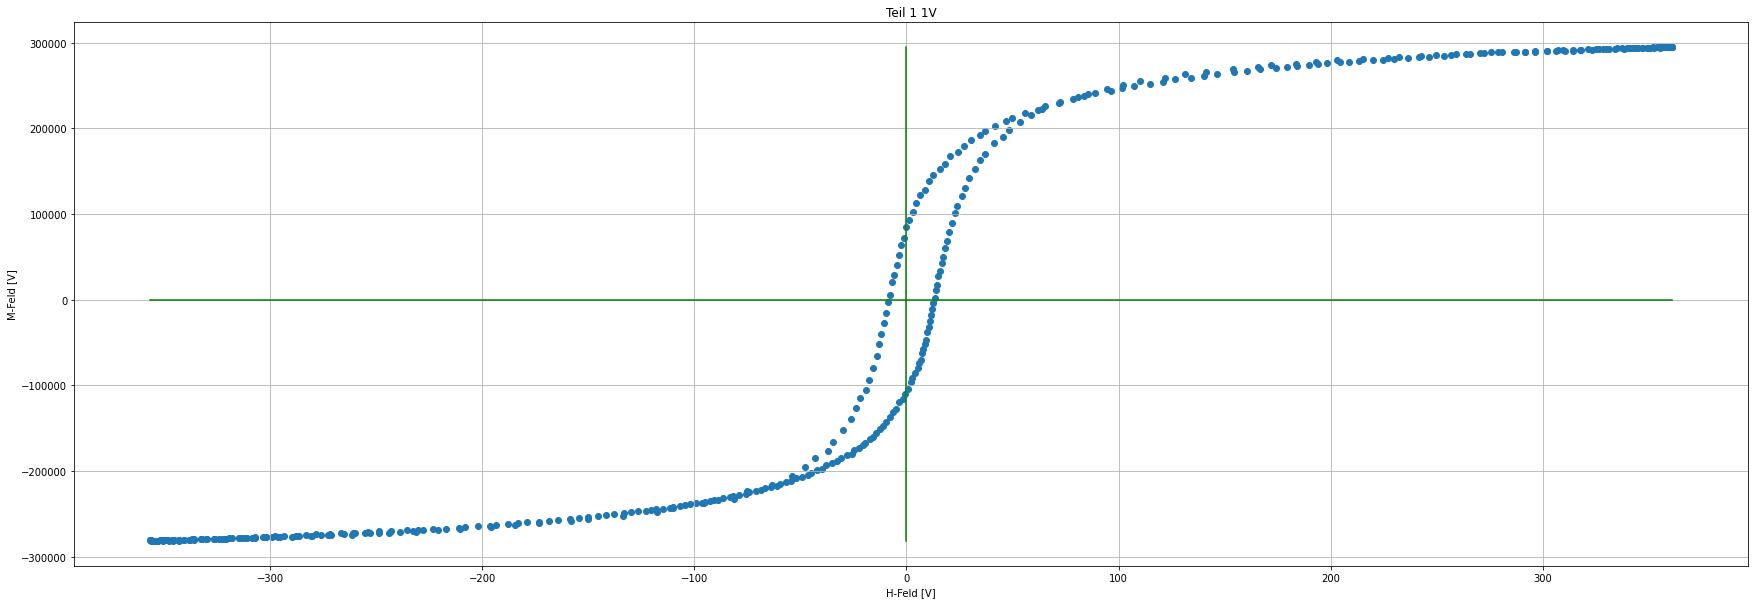

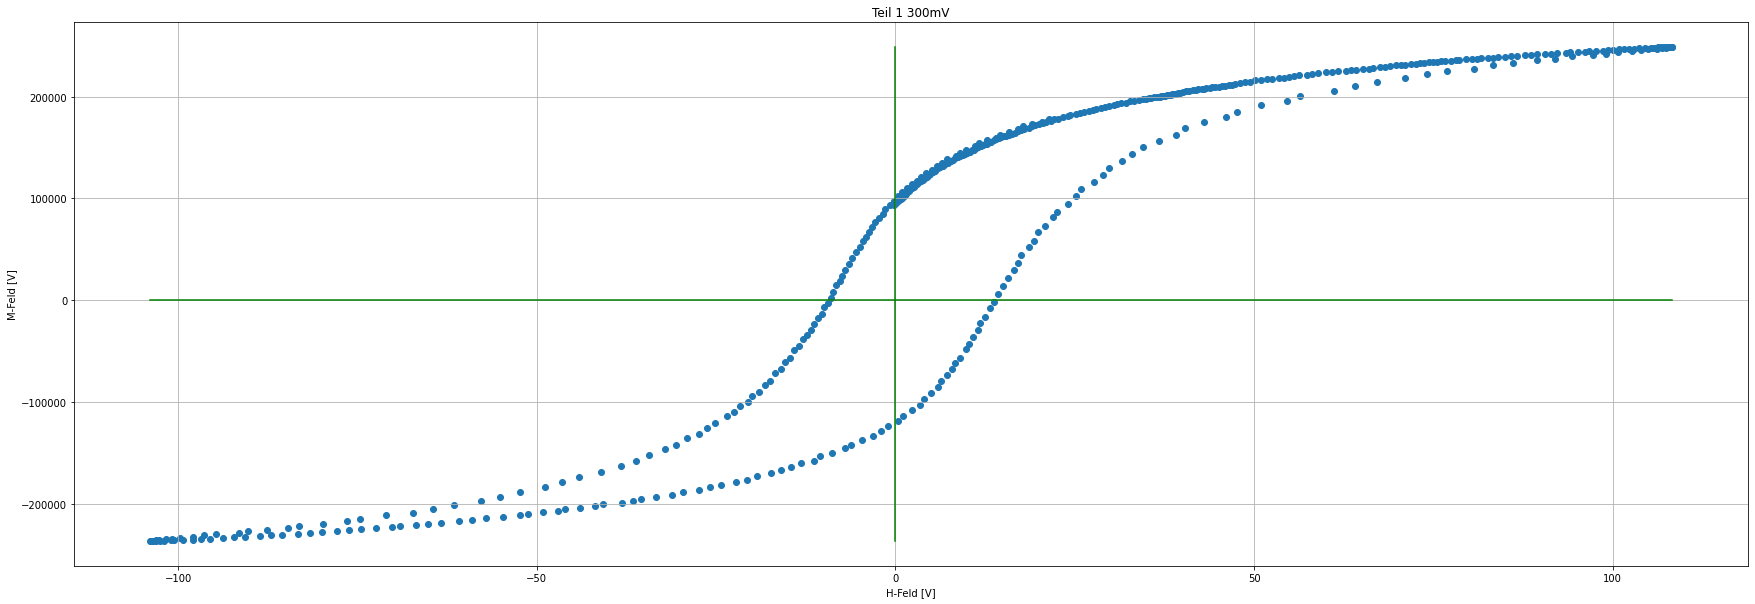

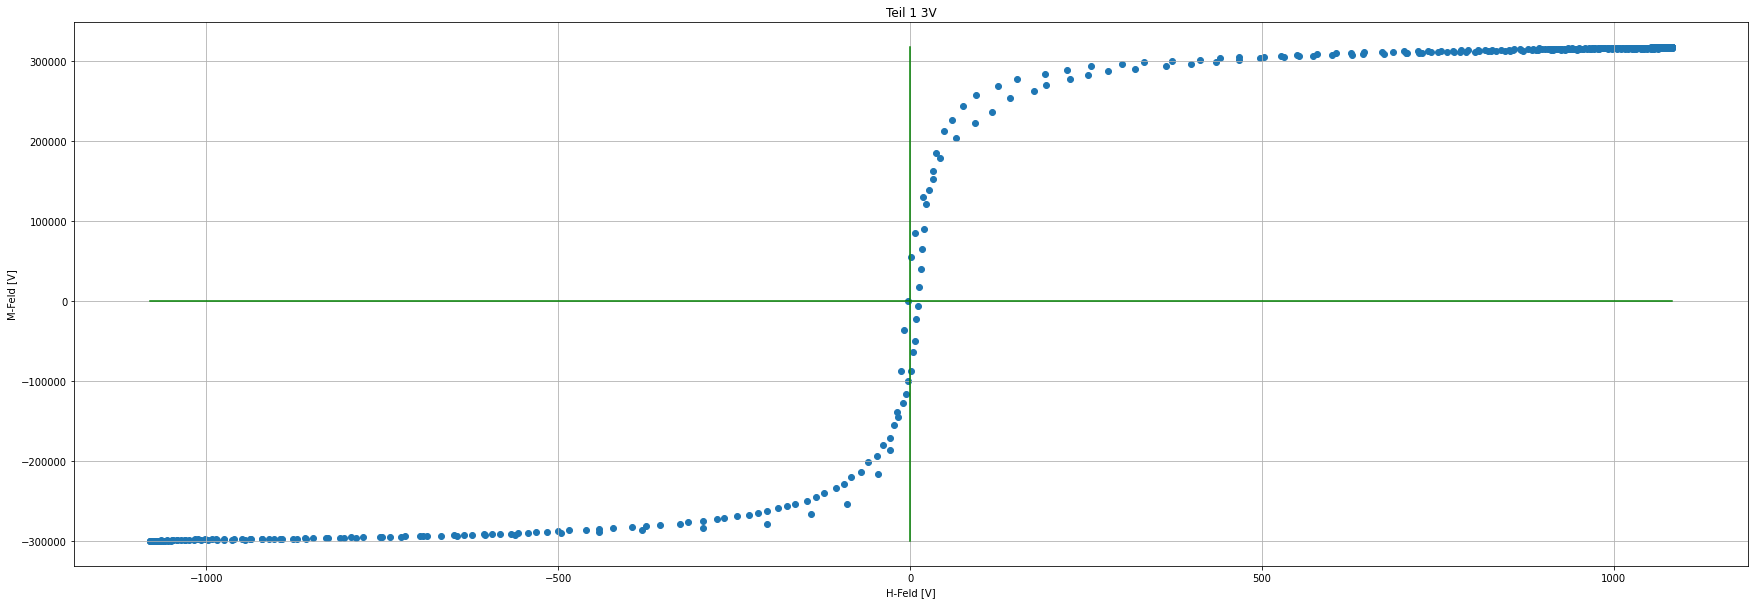

In [68]:
for name in os.listdir("Daten"):
    if "m" in name:
        Im = 1e-3*float(name.split(" ")[-1][:-2])
    else:
        Im =float(name.split(" ")[-1][:-1])
    
    plt.figure(figsize=(30,10))
    file = open("Daten/"+name)
    lines = file.readlines()
    xv,yv = [],[]
    #plt.xlim(-0.25,0.25)
    for line in lines:
        vals = line[:-1].split("\t")
        xv.append(float(vals[0]))
        yv.append(M(float(vals[1])))
    xv = np.array(xv)
    Um = max(xv)
    xv = H(Im,Um,xv)
    xv = list(xv)

    
    plt.scatter(xv,yv)
    plt.xlabel("H-Feld [V]")
    plt.ylabel("M-Feld [V]")
    file.close()
    

    x_ys0 = [x for i,x in enumerate(xv) if yv[i] < 0]
    x_yg0 = [x for i,x in enumerate(xv) if yv[i] > 0]
    
    y_xs0 = [y for i,y in enumerate(yv) if xv[i] < 0]
    y_xg0 = [y for i,y in enumerate(yv) if xv[i] > 0]
    
    print("=======",name,"=====")
    #print("Koerzitivmagnetisierung:",y_xs0)
    try:

        print("Koerzitivmagnetisierung:",round(1/2*(abs(xv[yv.index(min(abs(np.array(y_xs0))))])+abs(xv[yv.index(min(abs(np.array(y_xg0))))])),2))
    except:
        try:

            print("Koerzitivmagnetisierung:",round(1/2*(abs(xv[yv.index(-min(abs(np.array(y_xs0))))])+abs(xv[yv.index(min(abs(np.array(y_xg0))))])),2))
        except:
            try:
                print("Koerzitivmagnetisierung:",round(1/2*(abs(xv[yv.index(min(abs(np.array(y_xs0))))])+abs(xv[yv.index(-min(abs(np.array(y_xg0))))])),2))
            except:
                print("Koerzitivmagnetisierung:",round(1/2*(abs(xv[yv.index(-min(abs(np.array(y_xs0))))])+abs(xv[yv.index(-min(abs(np.array(y_xg0))))])),2))
    
    try:
        print("Remanenzmagnetisierung:",round(1/2*(abs(yv[xv.index(min(abs(np.array(x_ys0))))])+abs(yv[xv.index(min(abs(np.array(x_yg0))))]))/10000,2),"e4")
    except:
        try:
            print("Remanenzmagnetisierung:",round(1/2*(abs(yv[xv.index(-min(abs(np.array(x_ys0))))])+abs(yv[xv.index(min(abs(np.array(x_yg0))))]))/10000,2),"e4")
        except:
            try:
                print("Remanenzmagnetisierung:",round(1/2*(abs(yv[xv.index(min(abs(np.array(x_ys0))))])+abs(yv[xv.index(-min(abs(np.array(x_yg0))))]))/10000,2),"e4")
            except:
                print("Remanenzmagnetisierung:",round(1/2*(abs(yv[xv.index(-min(abs(np.array(x_ys0))))])+abs(yv[xv.index(-min(abs(np.array(x_yg0))))]))/10000,2),"e4")
    print("Maximale Magnetisierung",round(1/2*(abs(min(yv))+max(yv))/10000,2),"e4")
    
    x_abs = abs(np.array(xv))
    y_abs = abs(np.array(yv))
    plt.plot([0,0],[min(yv),max(yv)],color="green")
    plt.plot([min(xv),max(xv)],[0,0],color="green")
    plt.title(name)
    plt.grid(True)
    #print(xv[list(y_abs).index(min(y_abs))],yv[list(y_abs).index(min(y_abs))])
    #plt.scatter(xv[list(y_abs).index(min(y_abs))],yv[list(y_abs).index(min(y_abs))],color="red",linewidth=50)

In [69]:
def M(U):
    q = (0.9/10000) 
    np = 17
    ns = 17
    mu0 = 1.25663706212e-6
    #todo: den wert iwie halbieren
    return U/(47 *4* 1/(20e-3) * ns * mu0 * q)
def H(Im,Um,U):
    np = 17
    r = 1.5e-2
    u = 2*r*3.14
    L = u/2
    return np/L * Im/Um * U 

In [23]:
H(100e-3,10,2.5)

9.02335456475584

In [43]:
min(abs(np.array(x_ys0)))

1.4881639975641958